Pothole object detection




In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  
%cd yolov5
%pip install -qr requirements.txt 
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15338, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 15338 (delta 0), reused 2 (delta 0), pack-reused 15335
Receiving objects: 100% (15338/15338), 14.21 MiB | 29.40 MiB/s, done.
Resolving deltas: 100% (10523/10523), done.
/content/yolov5/yolov5
Setup complete. Using torch 1.13.1+cu116 (Tesla T4)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BFyUi8mrlKYGU0xjiLzI")
project = rf.workspace("jj-gitvi").project("pothole-pnro9")
dataset = project.version(1).download("yolov5")



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to pothole-1 in yolov5pytorch:: 100%|██████████| 1811/1811 [00:00<00:00, 2408.78it/s]


In [ ]:
 !python train.py --img 416 --batch 16 --epochs 60 --data /content/yolov5/pothole-1/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/pothole-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-128-gb96f35c Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015,

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-03-24 10:55:42.885335: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 10:55:43.877373: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-24 10:55:43.877470: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; L

In [ ]:
 !python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source /content/yolov5/pothole-1/test/images/vlcsnap-2020-04-08-23h23m13s588_jpg.rf.65b84c97b0524e684d6b7d1385981dc3.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/yolov5/pothole-1/test/images/vlcsnap-2020-04-08-23h23m13s588_jpg.rf.65b84c97b0524e684d6b7d1385981dc3.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-128-gb96f35c Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/pothole-1/test/images/vlcsnap-2020-04-08-23h23m13s588_jpg.rf.65b84c97b0524e684d6b7d1385981dc3.jpg: 416x416 2 0s, 8.1ms
Speed: 0.4ms pre-process, 8.1ms inference, 1.5ms NMS per image at shape (1, 3, 416, 416)
Results saved to ru

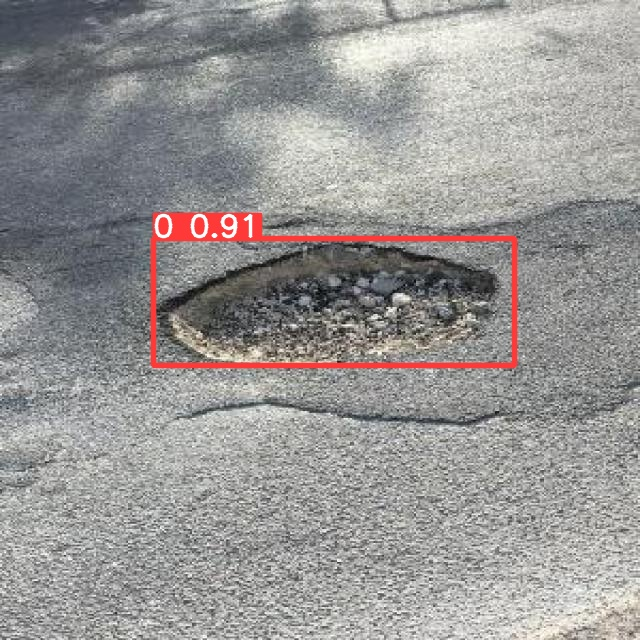

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/img-319_jpg.rf.701460a276c8f17f72e07348c99f0b5e.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')